In [61]:
import os
import pandas as pd
# import seaborn as sns

In [62]:
evaluations = [
    'experiments/tracking/5Zebrafish_nocover_22min/180427_vaib/evaluation.csv',
    'experiments/tracking/5Zebrafish_nocover_22min/__idtracker/evaluation_trajectories_nogaps.csv',
    'experiments/tracking/5Zebrafish_nocover_22min/__toxtrack/evaluation.csv',
]

In [63]:
all_evals = []
for path in evaluations:
    parts = path.split(os.sep)
    df = pd.read_csv(path)
    df.insert(0, 'experiment', parts[-2])
    all_evals.append(df)
df = pd.concat(all_evals)
df = df.replace('__idtracker', 'idtracker').replace('__toxtrack', 'toxtrack').set_index('experiment')
df

,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
experiment,,,,,,,,,,,,,,,
180427_vaib,0.881635,0.881723,0.881547,0.882253,0.882430,5,5,0,0,8816,8831,29,987,0.764320,181.964081
idtracker,0.930458,0.930489,0.930427,0.947533,0.947597,5,5,0,0,3930,3935,132,234,0.893373,264.281000
toxtrack,0.925810,0.999985,0.861880,0.861880,0.999985,5,5,0,0,1,10359,0,311,0.861867,34.326583


In [64]:
df.to_csv('5Zebrafish_nocover_22min_comparison.csv')

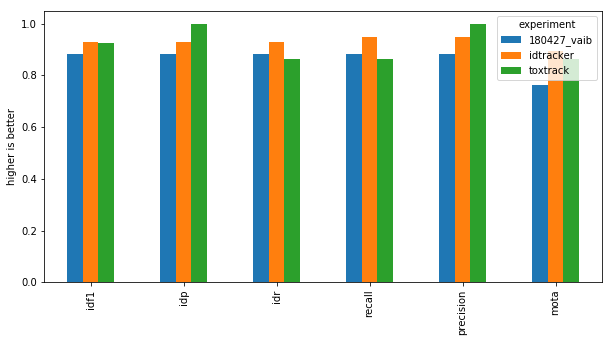

In [65]:
ax = df[['idf1', 'idp', 'idr', 'recall', 'precision','mota']].T.plot.bar(figsize=(10, 5))
_ = ax.set_ylabel('higher is better')

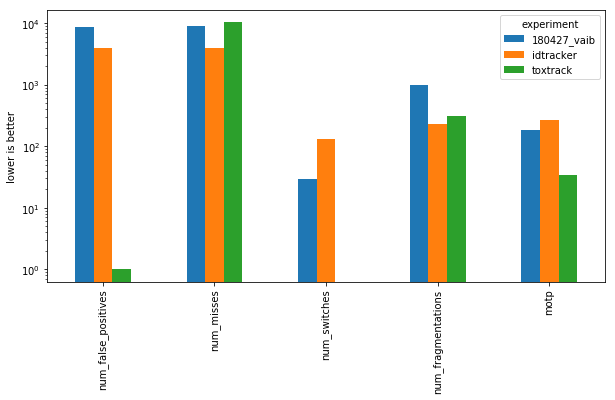

In [66]:
ax = df[['num_false_positives', 'num_misses', 'num_switches','num_fragmentations', 'motp']].T.plot.bar(figsize=(10, 5), logy=True)
_ = ax.set_ylabel('lower is better')